In [1]:
import os
import sys

# print(f"Current Working Directory --> {os.getcwd()}")
#Add one directory above research
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..")) # Get the parent directory
sys.path.append(parent_dir)
current_working_dir = %pwd

print(f"Parent Dir >>> {parent_dir}")
print(f"Current Working Dir >>> {current_working_dir}")
# from configs import cfgs  # Absolute import

Parent Dir >>> C:\Users\maz\dev\Projects_\alzheimer
Current Working Dir >>> C:\Users\maz\dev\Projects_\alzheimer\research


#### Imports

In [19]:
from pathlib import Path
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Custom Functions
from utils import plot_missing_value_distribution
from utils import categorize_columns_by_suffix
from utils import drop_rows_by_subset_missing_percentage
from utils import plot_missing_value_distribution_sns

#### Dataset Preprocessing

In [3]:
# Create a path object
# dataset_dir = cfgs["DATASET_DIR"]
dataset_dir = "..//dataset//modified"
dataset_path = Path(dataset_dir)
print("Dataset Path")
print("*"*12)
print(f"Dataset: {dataset_path}")
print("\n")

# Find all CSV files inside the directory
files = list(dataset_path.glob("*.csv"))

print("Files in Dataset Dir:")
print("*"*21)
for file_path in files:
    print(file_path.name)  # Print only the file name

# Combining multiple paths
# path_metadata = dataset_path / "MetaData.xlsx"
path_trainfeatures = dataset_path / "train_features.csv"
path_trainlabels   = dataset_path / "train_labels.csv"

path_testfeatures = dataset_path / "test_features.csv"
path_testlabels   = dataset_path / "test_labels.csv"

# Final Train, Test Paths
path_train        = dataset_path / "train.csv"
path_test         = dataset_path / "test.csv"

# print(f"MetaData File Path --> {path_metadata}")
print("\n")
print(f"Train Features File Path --> {path_trainfeatures}")
print(f"Train Labels File Path --> {path_trainlabels}")
# print("\n")
print(f"Test Features File Path --> {path_testfeatures}")
print(f"Test Labels File Path --> {path_testlabels}")
print("\n")
print(f"Train File Path --> {path_train}")
print(f"Test File Path --> {path_test}")

Dataset Path
************
Dataset: ..\dataset\modified


Files in Dataset Dir:
*********************
test.csv
test_features.csv
test_labels.csv
train.csv
train_features.csv
train_labels.csv
train_without_featEng.csv
train_with_featEng.csv


Train Features File Path --> ..\dataset\modified\train_features.csv
Train Labels File Path --> ..\dataset\modified\train_labels.csv
Test Features File Path --> ..\dataset\modified\test_features.csv
Test Labels File Path --> ..\dataset\modified\test_labels.csv


Train File Path --> ..\dataset\modified\train.csv
Test File Path --> ..\dataset\modified\test.csv


In [4]:
train_features      = pd.read_csv(path_trainfeatures, encoding="utf8")
train_labels        = pd.read_csv(path_trainlabels, encoding="utf8")

test_features       = pd.read_csv(path_testfeatures, encoding="utf8")
test_labels         = pd.read_csv(path_testlabels, encoding="utf8")

In [5]:
train_data = train_labels.merge(train_features, on="UID")

In [6]:
train_data["PredictionYear"] = train_data["Year"]-2012

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Columns: 185 entries, UID to PredictionYear
dtypes: float64(141), int64(3), object(41)
memory usage: 6.1+ MB


In [8]:
train_data.head(3)

,UID,Year,composite_score,Age_03,Urban_03,Married_03,Marriages_03,Education_03,Num_Living_Child_03,Migration_03,...,Meet_FnF_12,SocialActivities_12,AttendReligiousServices_12,a16a_12,YrsLivedInUSA_12,a22_12,a33b_12,SpeaksEnglish_12,HousingEnvironment_12,PredictionYear
0,aace,2021,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Never,Never,0.0,NaN,NaN,NaN,NaN,NaN,Concrete,9
1,aanz,2021,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Never,Almost Everyday,0.0,NaN,NaN,NaN,NaN,NaN,Concrete,9
2,aape,2016,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Every other Week,4 or Moretimes a week,0.0,NaN,NaN,NaN,NaN,NaN,"Wood, Mosaic, or other Covering",4


In [9]:
test_data = test_labels.merge(test_features, on="UID")

In [10]:
test_data["PredictionYear"] = test_data["Year"]-2012

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Columns: 185 entries, UID to PredictionYear
dtypes: float64(140), int64(3), object(42)
memory usage: 1.6+ MB


In [12]:
test_data.head(3)

,UID,Year,composite_score,Age_03,Urban_03,Married_03,Marriages_03,Education_03,Num_Living_Child_03,Migration_03,...,Meet_FnF_12,SocialActivities_12,AttendReligiousServices_12,a16a_12,YrsLivedInUSA_12,a22_12,a33b_12,SpeaksEnglish_12,HousingEnvironment_12,PredictionYear
0,abxu,2016,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wood, Mosaic, or other Covering",4
1,aeol,2016,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Never,Never,Yes,NaN,NaN,NaN,NaN,NaN,Concrete,4
2,aeol,2021,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Never,Never,Yes,NaN,NaN,NaN,NaN,NaN,Concrete,9


#### Save to .CSV

In [13]:
train_data.to_csv(path_train, index=False, encoding="utf8")
test_data.to_csv(path_test, index=False, encoding="utf8")

#### Read CSV

In [14]:
df_train      = pd.read_csv(path_train, encoding='utf8')
df_test       = pd.read_csv(path_test, encoding='utf8')

df_train.columns = df_train.columns.str.replace(r'[^\x00-\x7F]', '', regex=True)  # remove non-ASCII
df_train.columns = df_train.columns.str.strip()

df_test.columns = df_test.columns.str.replace(r'[^\x00-\x7F]', '', regex=True)  # remove non-ASCII
df_test.columns = df_test.columns.str.strip()

In [15]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 185 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    UID                         4343 non-null   object 
 1    Year                        4343 non-null   int64  
 2    composite_score             4343 non-null   int64  
 3    Age_03                      2887 non-null   object 
 4    Urban_03                    2889 non-null   object 
 5    Married_03                  2889 non-null   object 
 6    Marriages_03                2861 non-null   float64
 7    Education_03                2875 non-null   object 
 8    Num_Living_Child_03         2872 non-null   object 
 9    Migration_03                2887 non-null   float64
 10   GlobalHealth_03             2721 non-null   object 
 11   ADL_Dress_03                2722 non-null   float64
 12   ADL_Walk_03                 2880 non-null   float64
 13   ADL_Bath_03     

In [16]:
df_train.isnull().sum()
# df_train.isnull().sum(axis=1) # (axis=1 for row-wise sum)

UID                         0
Year                        0
composite_score             0
Age_03                   1456
Urban_03                 1454
                         ... 
a22_12                   4295
a33b_12                  4288
SpeaksEnglish_12         1601
HousingEnvironment_12      89
PredictionYear              0
Length: 185, dtype: int64

#### Shape

In [17]:
print(f"In the training data we have " + str(df_train.shape[0]) + " rows", str(df_train.shape[1]) + " columns")
print(f"In the test data we have " + str(df_test.shape[0]) + " rows", str(df_test.shape[1]) + " columns")

In the training data we have 4343 rows 185 columns
In the test data we have 1105 rows 185 columns


#### Plot Distribution of Missing Data

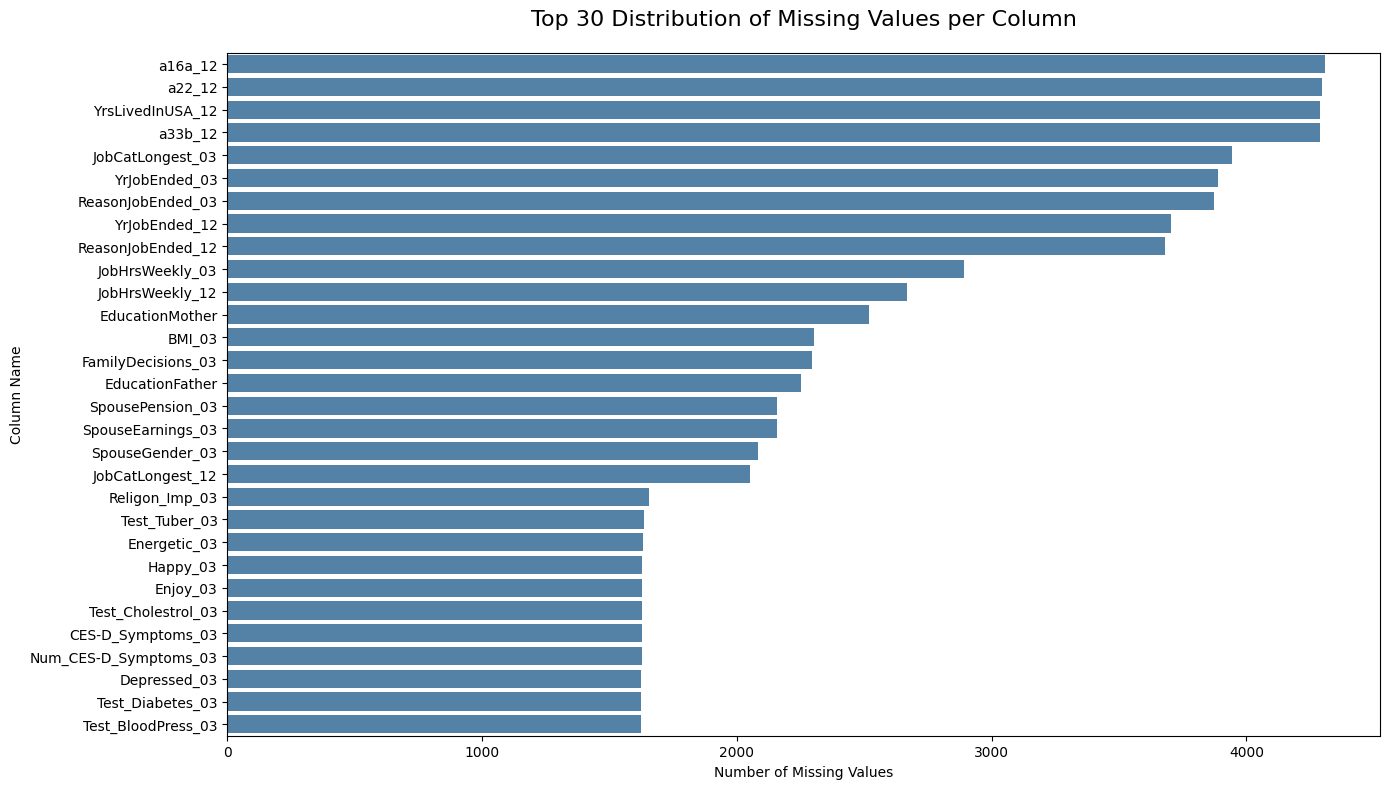

In [20]:
# Plot the missing value distribution
# # --- Plot | Plotly ---
# plot_missing_value_distribution(df_train, base_title='Missing Data Overview', )

# --- Plot | SNS
# Only Top N columns will be displayed
plot_missing_value_distribution_sns(df_train, top_n=30, figsize = (14, 8))

#### Categorize Columns by Suffix

- columns with `suffix _03` belongs to the data collected for `Year 2003`
- columns with `suffix _12` belongs to the data collected for `year 2012`

-   We will categorize columns/features into three categoies
- One category belongs to respondents of Year 03 (columns with suffix _03)
- Second category belongs to respondents of Year 12 (columns with suffix _12)
- Third category belongs to the rest/general or target
- Since large number of respondents belongs to Year 12, and Year 03 has most missing values
- We will take respondents who have data of `Year 03` and `Year 12` (both)

In [21]:
# Call the function
column_categories = categorize_columns_by_suffix(df_train)

# Access the lists and counts from the returned dictionary
cols_03 = column_categories['cols_03']
cols_12 = column_categories['cols_12']
cols_rest = column_categories['cols_rest']

count_03 = len(cols_03)
count_12 = len(cols_12)
count_rest = len(cols_rest)

# Print the results using the retrieved data
print(f"--- Columns with suffix '_03' (Count: {count_03}) ---")
print(cols_03)

print(f"\n--- Columns with suffix '_12' (Count: {count_12}) ---")
print(cols_12)

print(f"\n--- Other columns (Count: {count_rest}) ---")
print(cols_rest)

# Optional: Verify the total count matches the original columns
print(f"\nTotal columns processed: {count_03 + count_12 + count_rest}")
print(f"Original DataFrame total columns: {len(df_train.columns)}")

--- Columns with suffix '_03' (Count: 74) ---
['Age_03', 'Urban_03', 'Married_03', 'Marriages_03', 'Education_03', 'Num_Living_Child_03', 'Migration_03', 'GlobalHealth_03', 'ADL_Dress_03', 'ADL_Walk_03', 'ADL_Bath_03', 'ADL_Eat_03', 'ADL_Bed_03', 'ADL_Toilet_03', 'Num_ADL_03', 'IADL_Money_03', 'IADL_Meds_03', 'IADL_Shop_03', 'IADL_Meals_03', 'Num_IADL_03', 'Depressed_03', 'Hard_03', 'Restless_03', 'Happy_03', 'Lonely_03', 'Enjoy_03', 'Sad_03', 'Tired_03', 'Energetic_03', 'Num_CES-D_Symptoms_03', 'CES-D_Symptoms_03', 'Hypertension_03', 'Diabetes_03', 'Respiratory_Illness_03', 'Arthritis_03', 'HeartAttack_03', 'Stroke_03', 'Cancer_03', 'Num_Illnesses_03', 'BMI_03', 'Exercise_03', 'Alcohol_03', 'Tobacco_03', 'Test_Cholestrol_03', 'Test_Tuber_03', 'Test_Diabetes_03', 'Test_BloodPress_03', 'Hospitalized_03', 'Visit_Dr_03', 'OutPatient_03', 'Visit_Dental_03', 'imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03', 'Insured_03', 'FamilyDecisions_03', 'Employment_03', '

#### Drop Rows by Subset of Columns with Threshold

In [22]:
# Define the threshold
threshold = 80 # percentage

# Drop rows where >= 80% of _03 columns are missing
print(f"---Train---")
df_train_cleaned = drop_rows_by_subset_missing_percentage(df_train, cols_03, threshold)
print(f"---Test---")
df_test_cleaned = drop_rows_by_subset_missing_percentage(df_test, cols_03, threshold)

print("\n--- DataFrames after dropping ---")
print("Train | Cleaned DataFrame shape:", df_train_cleaned.shape)
print("Test  | Cleaned DataFrame shape:", df_test_cleaned.shape)
# You can inspect the cleaned DataFrame, the rows with index 3 and 4 should be gone
# print(df_cleaned)

---Train---
Criteria: Drop rows with >= 80% missing in 74 columns (Age_03, Urban_03, Married_03, Marriages_03, Education_03...)
Original rows: 4343
Rows dropped: 1454
Remaining rows: 2889
---Test---
Criteria: Drop rows with >= 80% missing in 73 columns (Age_03, Urban_03, Married_03, Marriages_03, Education_03...)
Original rows: 1105
Rows dropped: 359
Remaining rows: 746

--- DataFrames after dropping ---
Train | Cleaned DataFrame shape: (2889, 185)
Test  | Cleaned DataFrame shape: (746, 185)


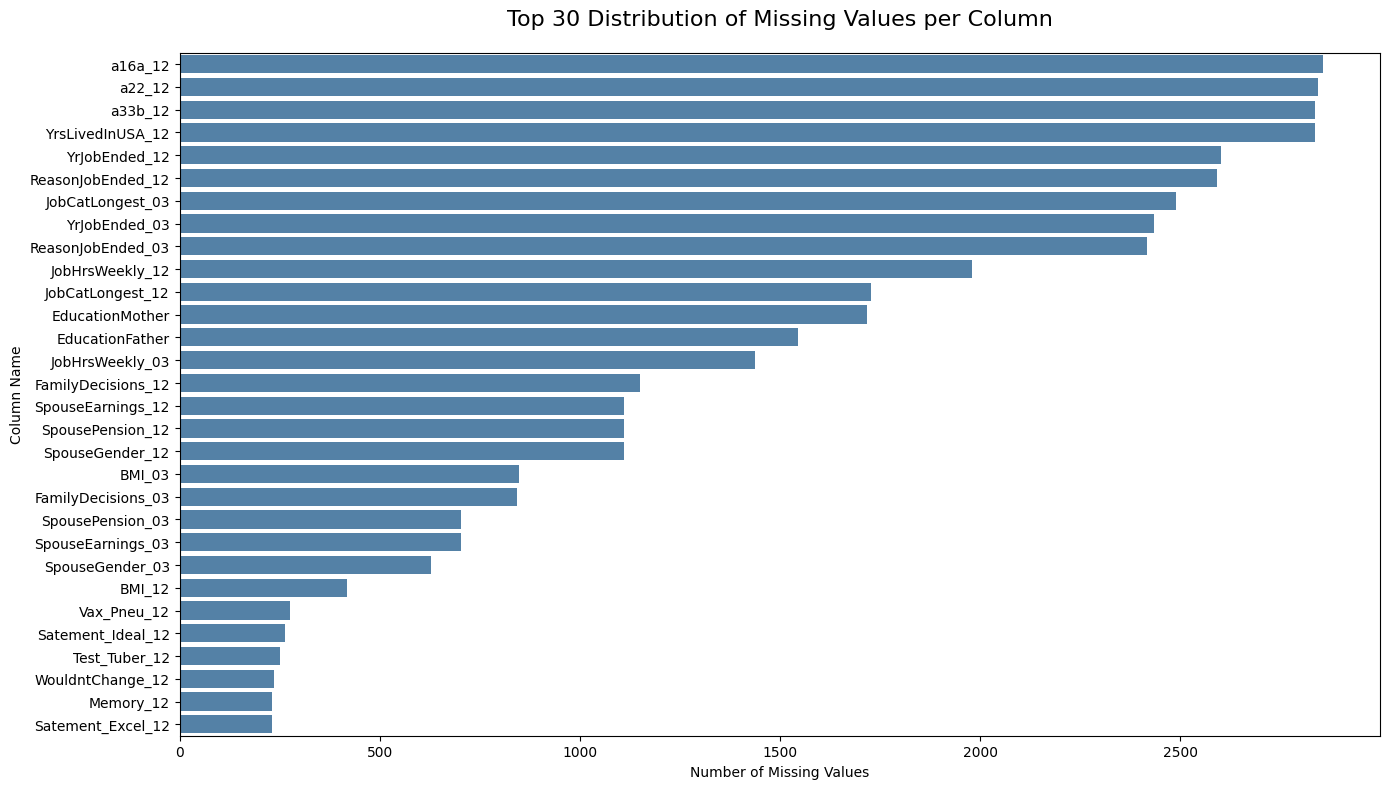

In [25]:
# Plot the missing value distribution
# # --- Plot | Plotly ---
# plot_missing_value_distribution(df_train_cleaned, base_title='Missing Data Overview', )

# --- Plot | SNS
# Only Top N columns will be displayed
plot_missing_value_distribution_sns(df_train_cleaned, top_n=30, figsize = (14, 8))

#### Save to .CSV

In [24]:
df_train_cleaned.to_csv(path_train, index=False, encoding="utf8")
df_test_cleaned.to_csv(path_test, index=False, encoding="utf8")

print(f"Train CSV Saved >>> {path_train}")
print(f"Test CSV Saved >>> {path_train}")

Train CSV Saved >>> ..\dataset\modified\train.csv
Test CSV Saved >>> ..\dataset\modified\train.csv
